In [1]:
import os
import subprocess as sp
import pickle
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.lm import Vocabulary

In [2]:
pdf_folder = "data/raw/guemes/pdf"
txt_folder = "data/raw/guemes/text"

In [3]:
files = sorted(os.listdir(pdf_folder))
files

['g_documentado01.pdf',
 'g_documentado02.pdf',
 'g_documentado03.pdf',
 'g_documentado04.pdf',
 'g_documentado05.pdf',
 'g_documentado06.pdf',
 'g_documentado07.pdf',
 'g_documentado08.pdf',
 'g_documentado09.pdf',
 'g_documentado10.pdf',
 'g_documentado11.pdf',
 'g_documentado12.pdf']

In [4]:
os.path.join(pdf_folder, files[0])

'data/raw/guemes/pdf/g_documentado01.pdf'

In [5]:
p = sp.run(["pdftotext", os.path.join(pdf_folder, files[0]), os.path.join(txt_folder, files[0][:-4] + ".txt")])
p

CompletedProcess(args=['pdftotext', 'data/raw/guemes/pdf/g_documentado01.pdf', 'data/raw/guemes/text/g_documentado01.txt'], returncode=0)

In [6]:
p.returncode

0

In [7]:
for f in files:
    p = sp.run(["pdftotext", 
                os.path.join(pdf_folder, f), 
                os.path.join(txt_folder, f[:-4] + ".txt")])
    print(f, p.returncode) 

g_documentado01.pdf 0
g_documentado02.pdf 0
g_documentado03.pdf 0
g_documentado04.pdf 0
g_documentado05.pdf 0
g_documentado06.pdf 0
g_documentado07.pdf 0
g_documentado08.pdf 0
g_documentado09.pdf 0
g_documentado10.pdf 0
g_documentado11.pdf 0
g_documentado12.pdf 0


In [8]:
text = []
for f in sorted(os.listdir(txt_folder)):
    with open(os.path.join(txt_folder, f)) as file:
        text.append(file.read())
    print(f)
    
text[0][:100]

g_documentado01.txt
g_documentado02.txt
g_documentado03.txt
g_documentado04.txt
g_documentado05.txt
g_documentado06.txt
g_documentado07.txt
g_documentado08.txt
g_documentado09.txt
g_documentado10.txt
g_documentado11.txt
g_documentado12.txt


'\x0cLUIS GÜEMES\n\nPLUS ULTRA\n\nTOMO 1\n\n\x0cEl retrato de Güemes que aparece en la tapa, fue reconocido\ncomo '

In [9]:
[type(x) for x in text]

[str, str, str, str, str, str, str, str, str, str, str, str]

In [10]:
info = pd.DataFrame(pd.Series(text), columns = ["text"])
info.head()

,text
0,LUIS GÜEMES\n\nPLUS ULTRA\n\nTOMO 1\n\n El re...
1,1\n\nLUIS GUEMES\n\nPLUS ULTRA\n\nGUEMES\nOOC...
2,LUIS GUEMES\n\n@.\nPLUS ULTRA\n\nTOMO 3\n\n E ...
3,LUIS GUEMES\n\nPLUS ULTRA\n\nGUEMES\nDOCUMENT...
4,LUIS GUEMES\n\nPLUS ULTRA\n\nGUEMES\nOCUMENTA...


In [11]:
# number of characters in each tome

info["text"].map(len).map(lambda x: "{:,.1f}".format(x))

0     1,185,163.0
1     1,142,314.0
2     1,085,642.0
3       971,892.0
4       961,392.0
5     1,156,215.0
6       948,264.0
7       873,687.0
8     1,036,374.0
9     1,038,678.0
10    1,136,855.0
11      801,370.0
Name: text, dtype: object

In [12]:
x = sent_tokenize(info["text"][0])
x[:10]

['\x0cLUIS GÜEMES\n\nPLUS ULTRA\n\nTOMO 1\n\n\x0cEl retrato de Güemes que aparece en la tapa, fue reconocido\ncomo el más fidedigno por el Poder Ejecutivo de Salta, el 5 de\njunio de 1965 previa consulta a "eminentes autoridades en la materia, como el doctor Luis Güemes (biznieto del héroe) y el doctor\nAtilio Cornejo".',
 'Y "por ello el Gobernador de la Provincia decreta:\nArtículo 10-Dispónese la certificación y declárase legalizado\nel retrato del general Martín Miguel de Güemes, realizado por el\nafamado artista don Eduardo Schiaffino, en mérito a las consideraciones expuestas precedentemente".',
 'FRANCISCO\nM. GUEIIIES\n\nQueda hecho el depósito que previene la ley 11.723\nImpreso en l a Argentina - Printed in Argentina\nQ 1979 by Editorial PLUS ULTRA\nVIAMONTE 1755, 1055 Buenos Aires\n\n\x0cINDICE\n\nPAG.',
 'Al lector .',
 'Aclaraciones\n\n.',
 '.',
 '.',
 '.',
 '.',
 '.']

In [13]:
sentences = info["text"]\
.map(lambda x: sent_tokenize(x))\
.map(lambda x: list(enumerate(x)))\
.explode()\
.reset_index()\
.assign(order = lambda df: df["text"].map(lambda x: x[0]), 
        text = lambda df: df["text"].map(lambda x: x[1]),
        tome = lambda df: df["index"] + 1)\
.drop("index", axis = 1)\
[["tome", "order", "text"]]

sentences.head(10)

,tome,order,text
0,1,0,LUIS GÜEMES\n\nPLUS ULTRA\n\nTOMO 1\n\n El re...
1,1,1,"Y ""por ello el Gobernador de la Provincia decr..."
2,1,2,FRANCISCO\nM. GUEIIIES\n\nQueda hecho el depós...
3,1,3,Al lector .
4,1,4,Aclaraciones\n\n.
5,1,5,.
6,1,6,.
7,1,7,.
8,1,8,.
9,1,9,.


In [14]:
sentences.shape

(129859, 3)

In [15]:
# number of sentences per tome

sentences.groupby("tome").count()["text"]

tome
1     16105
2      8698
3      9323
4     10079
5     10020
6     15240
7      5039
8      9378
9     12874
10    10553
11     7986
12    14564
Name: text, dtype: int64

In [16]:
# number of characters per tome

sentences.assign(length = lambda df: df["text"].map(len)).groupby("tome").sum()\
["length"].map(lambda x: "{:,}".format(x))

tome
1     1,168,327
2     1,132,814
3     1,075,356
4       960,970
5       950,481
6     1,139,681
7       942,816
8       863,446
9     1,022,883
10    1,027,769
11    1,128,348
12      785,702
Name: length, dtype: object

# exploratory data analysis

## sentence length

In [17]:
sentences["text"].map(len).describe()

count    129859.000000
mean         93.937217
std         154.729286
min           1.000000
25%           7.000000
50%          33.000000
75%         118.000000
max        5088.000000
Name: text, dtype: float64

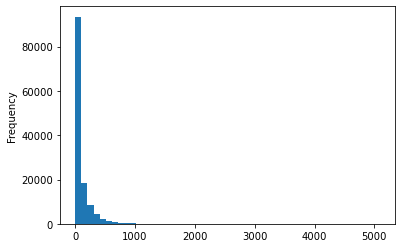

In [18]:
sentences["text"].map(len).plot.hist(bins = 50)

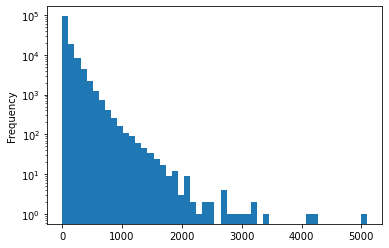

In [19]:
sentences["text"].map(len).plot.hist(log = True, bins = 50)

## character counts

In [20]:
char_counts = pd.Series(Vocabulary("".join(text)).counts).sort_values(ascending = False)
char_counts.head(10)

     1976866
e    1224027
a     998312
o     829697
s     652243
n     632788
r     609616
i     583953
d     508753
l     449436
dtype: int64

In [21]:
"{:,}".format(char_counts.sum())

'12,337,846'

In [22]:
char_counts.describe().map(lambda x: "{:,.1f}".format(x))

count          117.0
mean       105,451.7
std        271,124.9
min              2.0
25%            797.0
50%         13,257.0
75%         45,278.0
max      1,976,866.0
dtype: object

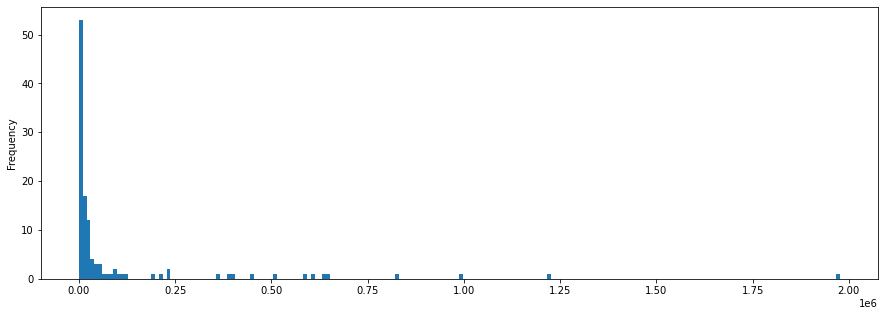

In [23]:
plt.figure(figsize = (15, 5))
char_counts.plot.hist(bins = 200)

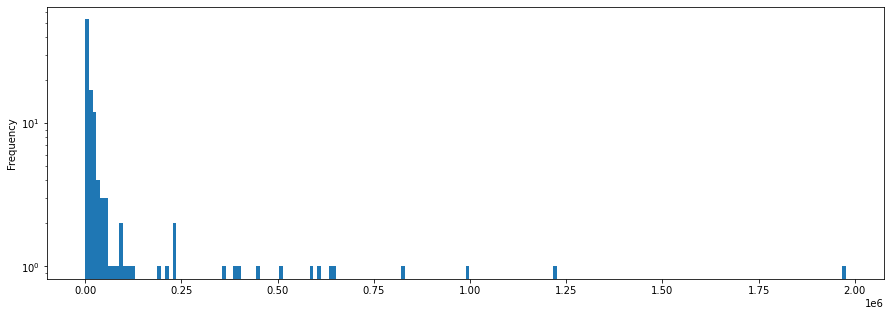

In [24]:
plt.figure(figsize = (15, 5))
char_counts.plot.hist(bins = 200, log = True)

/home/jarobyte/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jarobyte/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


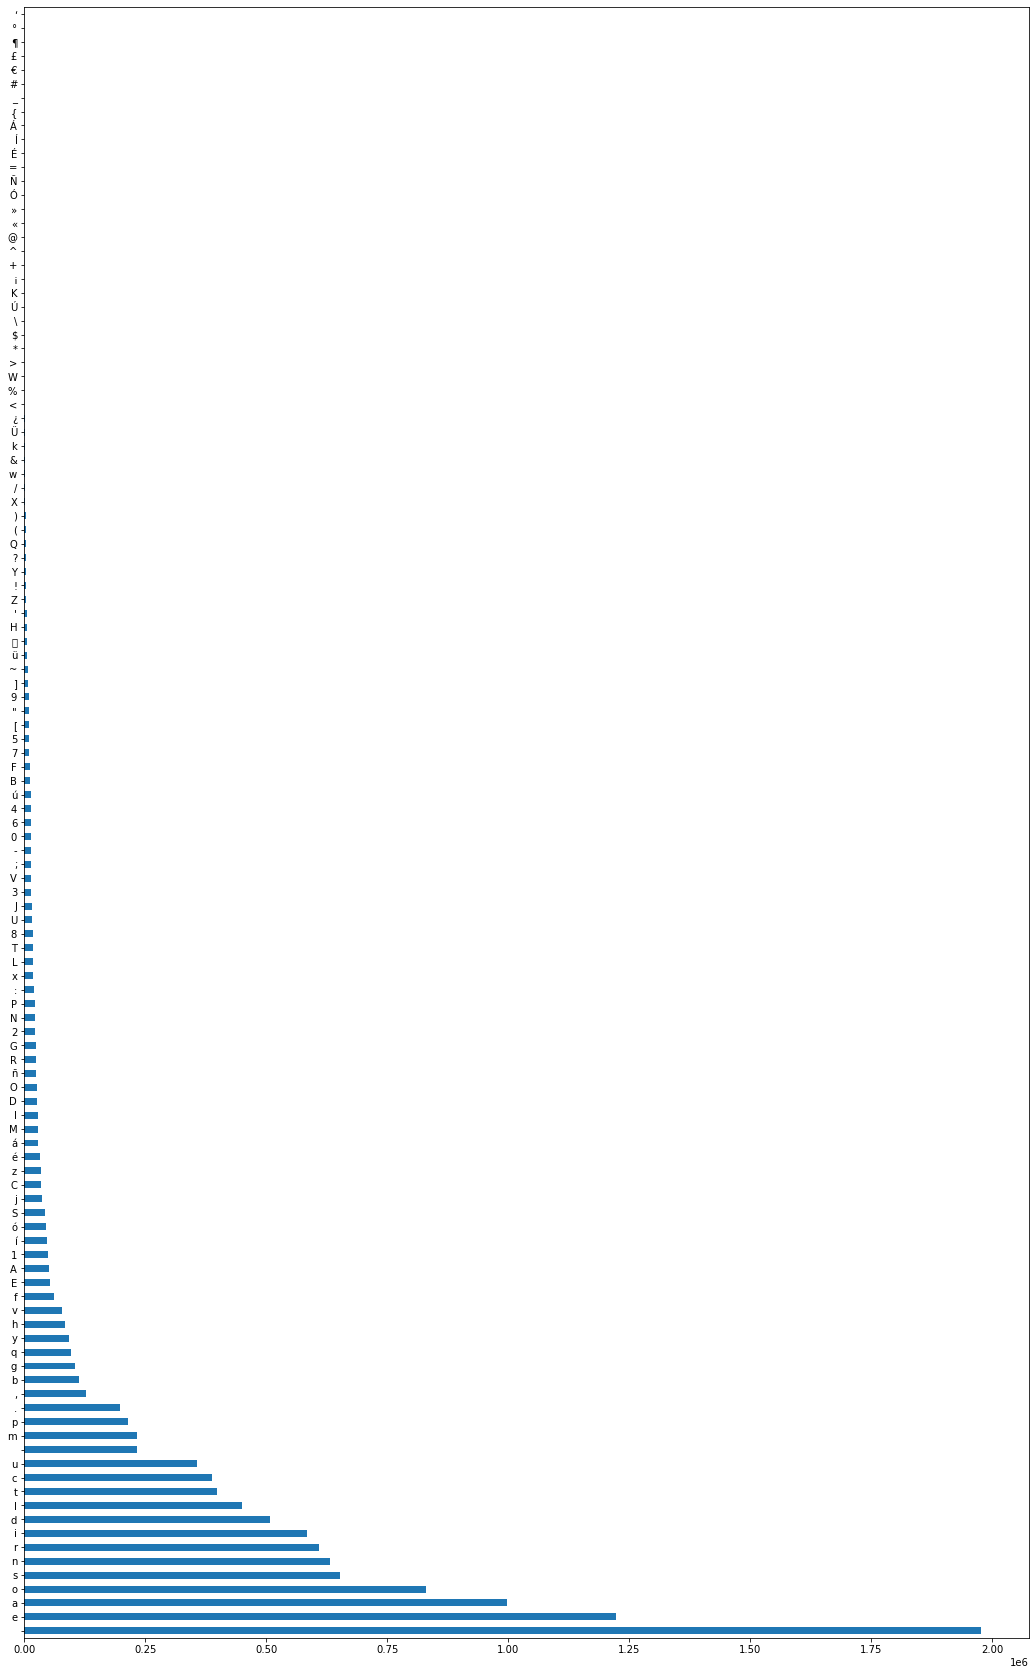

In [25]:
plt.figure(figsize = (18, 30))
char_counts.plot.barh()

# vocabulary

In [26]:
words = sentences["text"].map(lambda x: word_tokenize(x)).explode()
words.head()

0      LUIS
0    GÜEMES
0      PLUS
0     ULTRA
0      TOMO
Name: text, dtype: object

In [27]:
words.value_counts().head(20)

de      135518
,       126367
.       126207
que      72100
y        62714
a        58887
la       53355
en       44942
el       42776
los      27498
del      26113
se       21727
por      20739
con      20512
:        19400
las      17181
para     16212
su       14498
;        13463
no       13234
Name: text, dtype: int64

In [28]:
"{:,}".format(words.size)

'2,491,448'

In [29]:
"{:,}".format(words.value_counts().size)

'123,117'

In [30]:
sentences.to_pickle("data/raw/guemes_sentences.pkl")